# a)

In [52]:
import gymnasium as gym 
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt

In [25]:
class GridWorldEnv(gym.Env):
    def __init__(self, n=5, loc_a=np.array([4, 1]), loc_a_=np.array([0, 1]), loc_b=np.array([4, 3]), loc_b_=np.array([2, 3]), rew_a=10, rew_b=5):
        super(GridWorldEnv, self).__init__()
        
        # Parameter der Grid-World
        self.n = n
        self.loc_a = loc_a
        self.loc_a_ = loc_a_
        self.loc_b = loc_b
        self.loc_b_ = loc_b_
        self.rew_a = rew_a
        self.rew_b = rew_b
        self.current_rew = 0

        # Aktionen und Beobachtungen festlegen
        self.action_space = spaces.Discrete(4)  # 0: Nord, 1: Süd, 2: West, 3: Ost
        self.observation_space = spaces.MultiDiscrete([n, n])  # Position in der n x n Grid-World
        
        # Anfangszustand und Belohnung initialisieren
        self.reset()
    
    def reset(self, seed = None, options = None):
        if seed is not None:
            np.random.seed(seed)

        # Anfangszustand und Belohnung für eine neue Episode zurücksetzen
        self.current_pos = np.array([2, 2])
        self.done = False
        return self.current_pos, {}

    def step(self, action):
        # Check for special rewards and positions
        if (self.current_pos == self.loc_a).all():
            self.current_rew += self.rew_a
            self.current_pos = self.loc_a_
            reward = self.rew_a
            self.done = False
            return self.current_pos, self.current_rew, self.done, False, {}
        
        elif (self.current_pos == self.loc_b).all():
            self.current_rew += self.rew_b
            self.current_pos = self.loc_b_
            reward = self.rew_b
            self.done = False
            return self.current_pos, self.current_rew, self.done, False, {}
        
        else:
            if action == 0:   # Nord
                if self.current_pos[0] < self.n - 1:
                    self.current_pos[0] += 1
                else:
                    self.current_rew += -1
                    reward = -1
            elif action == 1: # Süd
                if self.current_pos[0] > 0:
                    self.current_pos[0] -= 1
                else:
                    self.current_rew += -1
                    reward = -1
            elif action == 2: # West
                if self.current_pos[1] > 0:
                    self.current_pos[1] -= 1
                else:
                    self.current_rew += -1
                    reward = -1
            elif action == 3: # Ost
                if self.current_pos[1] < self.n - 1:
                    self.current_pos[1] += 1
                else:
                    self.current_rew += -1
                    reward = -1

            # Überprüfen, ob die Episode beendet ist
            self.done = False
            
            return self.current_pos, self.current_rew, self.done, False, {}
    
    def render(self):
            grid = np.zeros((self.n, self.n))
            grid[self.current_pos[0], self.current_pos[1]] = 1
            
            # Rückgabe als Bilddaten (für Screenshots oder Analyse)
            fig, ax = plt.subplots()
            ax.imshow(grid, cmap="viridis", origin="lower")

            # Entfernt die Achsen und den Rahmen
            ax.axis("off")
            fig.canvas.draw()

            # Konvertiert das Bild zu einem numpy-Array
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            #plt.close(fig)  # Schließt das Bild, um Speicher zu sparen
            return image
    
    def close(self):
        pass

# b)

In [28]:
from gymnasium.envs.registration import register

register(
    id='GridWorldEnv-v0',           # Eindeutige Kennung für die Umgebung
    entry_point='__main__:GridWorldEnv',  # Pfad zur Klasse der Umgebung
)


c:\Users\Adam-\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment GridWorldEnv-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


State: [3 2], Reward: 0, Done: False
State: [4 2], Reward: 0, Done: False
State: [4 3], Reward: 0, Done: False
State: [2 3], Reward: 5, Done: False


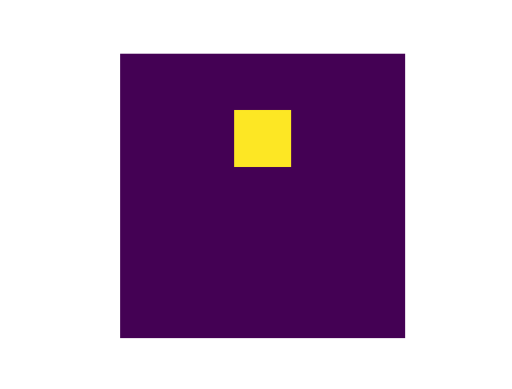

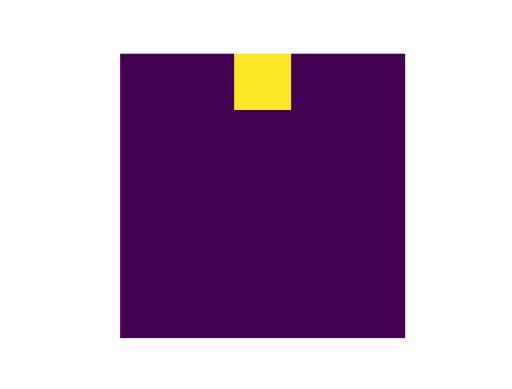

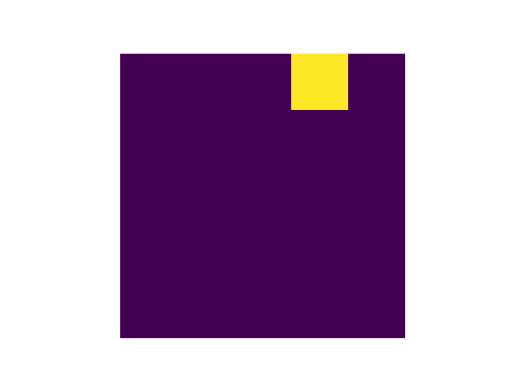

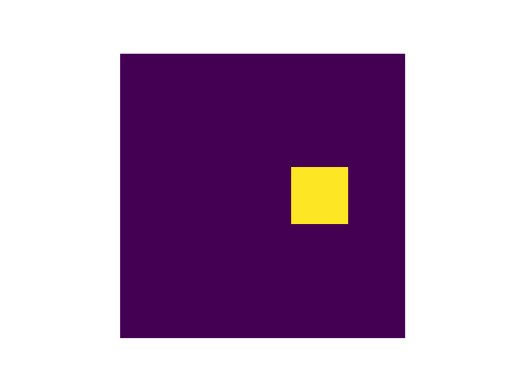

In [29]:
# Umgebung erstellen
env = gym.make('GridWorldEnv-v0')
state, _ = env.reset()

# Simulationsschleife
screenshots = []
for _ in range(4):
    action = env.action_space.sample()  # Zufällige Aktion
    state, reward, done, _, info = env.step(action)
    screenshot = env.render()  # Rendern als Bild
    plt.imshow(screenshot)
    screenshots.append(screenshot)
    print(f"State: {state}, Reward: {reward}, Done: {done}")

env.close()
